In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [3]:

import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from spacy.lang.en.stop_words import STOP_WORDS

##### Put the hyparameters at the top like this to make it easier to change and edit.

In [4]:
vocab_size = 5000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

#### First, let's define two lists that containing articles and labels. In the meantime, we remove stopwords.

In [7]:
articles = []
labels = []

with open("data/bbc-news.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in STOP_WORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(labels))
print(len(articles))

2225
2225


#### There are only 2,225 articles in the data. Then we split into training set and validation set, according to the parameter we set earlier, 80% for training, 20% for validation.

In [8]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

1780
1780
1780
445
445


Tokenizer does all the heavy lifting for us. In our articles that it was tokenizing, it will take 5,000 most common words. oov_token is to put a special value in when an unseen word is encountered. This means I want "OOV" in bracket to be used to for words that are not in the word index. "fit_on_text" will go through all the text and create dictionary like this:

In [9]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index

You can see that "OOV" in bracket is number 1, "said" is number 2, "mr" is number 3, and so on.

In [10]:
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 's': 2,
 'said': 3,
 'mr': 4,
 'year': 5,
 'people': 6,
 'new': 7,
 't': 8,
 'time': 9,
 'government': 10}

This process cleans up our text, lowercase, and remove punctuations.

After tokenization, the next step is to turn thoes tokens into lists of sequence.

In [11]:
train_sequences = tokenizer.texts_to_sequences(train_articles)

This is the 11th article in the training data that has been turned into sequences.

In [12]:
print(train_sequences[10])

[2354, 1, 185, 4923, 15, 577, 523, 185, 4923, 1, 1, 1580, 1, 1, 2354, 15, 503, 1, 1, 109, 234, 1, 109, 234, 723, 750, 596, 2229, 1, 1063, 1612, 1, 1639, 4924, 1, 1, 1, 1, 1, 4666, 1, 1, 91, 4443, 1, 3, 2795, 1423, 4667, 1, 36, 2091, 3884, 26, 15, 3715, 1, 1, 1, 1, 2, 480, 1, 1, 1, 762, 567, 2, 2287, 297, 4668, 1, 15, 1, 715, 2288, 1, 4228, 107, 1, 2, 3583, 614, 3449, 1, 15, 1, 358, 750, 596, 1, 64, 569, 1, 185, 4923, 1, 535, 1, 1612, 941, 1, 4925, 734, 1784, 87, 1, 1, 1, 2, 2895, 15, 1, 234, 1, 2, 1526, 4926, 480, 434, 1, 1364, 4669, 706, 1240, 1, 1780, 577, 274, 1, 419, 503, 256, 1424, 15, 420, 1, 2, 1, 1584, 1, 724, 1, 2987, 1, 1284, 1, 2354, 503, 15, 2892, 4663, 1, 1, 1, 1, 1, 776, 24, 1745, 608, 252, 17, 901, 1, 808, 15, 309, 15, 256, 1424, 1262, 320, 14, 42, 809, 1015, 4229, 206]


When we train neural networks for NLP, we need sequences to be in the same size, that's why we use padding. Our max_length is 200, so we use pad_sequences to make all of our articles the same length which is 200 in my example. That's why you see that the 1st article was 426 in length, becomes 200, the 2nd article was 192 in length, becomes 200, and so on

In [13]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [14]:
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

389
200
178
200
179
200


In addtion, there is padding type and truncating type, there are all "post". Means for example, for the 11th article, it was 186 in length, we padded to 200, and we padded at the end, add 14 zeros.

In [15]:
print(train_sequences[10])

[2354, 1, 185, 4923, 15, 577, 523, 185, 4923, 1, 1, 1580, 1, 1, 2354, 15, 503, 1, 1, 109, 234, 1, 109, 234, 723, 750, 596, 2229, 1, 1063, 1612, 1, 1639, 4924, 1, 1, 1, 1, 1, 4666, 1, 1, 91, 4443, 1, 3, 2795, 1423, 4667, 1, 36, 2091, 3884, 26, 15, 3715, 1, 1, 1, 1, 2, 480, 1, 1, 1, 762, 567, 2, 2287, 297, 4668, 1, 15, 1, 715, 2288, 1, 4228, 107, 1, 2, 3583, 614, 3449, 1, 15, 1, 358, 750, 596, 1, 64, 569, 1, 185, 4923, 1, 535, 1, 1612, 941, 1, 4925, 734, 1784, 87, 1, 1, 1, 2, 2895, 15, 1, 234, 1, 2, 1526, 4926, 480, 434, 1, 1364, 4669, 706, 1240, 1, 1780, 577, 274, 1, 419, 503, 256, 1424, 15, 420, 1, 2, 1, 1584, 1, 724, 1, 2987, 1, 1284, 1, 2354, 503, 15, 2892, 4663, 1, 1, 1, 1, 1, 776, 24, 1745, 608, 252, 17, 901, 1, 808, 15, 309, 15, 256, 1424, 1262, 320, 14, 42, 809, 1015, 4229, 206]


In [16]:
print(train_padded[10])

[2354    1  185 4923   15  577  523  185 4923    1    1 1580    1    1
 2354   15  503    1    1  109  234    1  109  234  723  750  596 2229
    1 1063 1612    1 1639 4924    1    1    1    1    1 4666    1    1
   91 4443    1    3 2795 1423 4667    1   36 2091 3884   26   15 3715
    1    1    1    1    2  480    1    1    1  762  567    2 2287  297
 4668    1   15    1  715 2288    1 4228  107    1    2 3583  614 3449
    1   15    1  358  750  596    1   64  569    1  185 4923    1  535
    1 1612  941    1 4925  734 1784   87    1    1    1    2 2895   15
    1  234    1    2 1526 4926  480  434    1 1364 4669  706 1240    1
 1780  577  274    1  419  503  256 1424   15  420    1    2    1 1584
    1  724    1 2987    1 1284    1 2354  503   15 2892 4663    1    1
    1    1    1  776   24 1745  608  252   17  901    1  808   15  309
   15  256 1424 1262  320   14   42  809 1015 4229  206    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

And for the 1st article, it was 426 in length, we truncated to 200, and we truncated at the end.

In [20]:
print(train_sequences[0])

[65, 124, 1060, 1025, 33, 901, 684, 1, 63, 1223, 4215, 98, 138, 3573, 1134, 1114, 1495, 27, 6, 819, 65, 1, 287, 14, 9, 99, 3183, 1135, 2344, 507, 394, 1296, 3298, 3439, 1578, 7, 845, 661, 771, 1, 534, 1496, 1026, 339, 1862, 1025, 33, 475, 1319, 1933, 1541, 103, 208, 83, 2276, 4907, 902, 520, 3879, 3880, 845, 2484, 98, 295, 138, 3573, 1, 1, 24, 1497, 2789, 19, 2, 4651, 12, 2, 1224, 105, 360, 6, 112, 1342, 49, 4431, 378, 4908, 65, 1026, 54, 1, 58, 1934, 1, 65, 928, 545, 63, 1223, 65, 1886, 100, 106, 364, 2790, 118, 1153, 63, 1223, 4652, 6, 378, 4908, 3075, 2414, 1, 374, 1045, 1, 1343, 1091, 1822, 1, 694, 475, 1319, 1933, 103, 1989, 344, 772, 1887, 1519, 150, 1635, 2791, 1, 1, 2345, 2545, 58, 662, 1092, 1115, 118, 652, 527, 1, 93, 19, 1224, 1608, 375, 85, 14, 9, 12, 3076, 1, 23, 1402, 2, 1, 16, 23, 61, 288, 2277, 23, 409, 214, 1887, 1278, 2638, 1, 254, 662, 1093, 12, 2792, 1635, 1, 250, 1, 993, 339, 1935, 374, 1935, 3, 1279, 1, 1635, 2085, 47, 1, 1, 1636, 208, 1579, 2979, 1094, 339, 26, 8

In [18]:
print(train_padded[0])

[  65  124 1060 1025   33  901  684    1   63 1223 4215   98  138 3573
 1134 1114 1495   27    6  819   65    1  287   14    9   99 3183 1135
 2344  507  394 1296 3298 3439 1578    7  845  661  771    1  534 1496
 1026  339 1862 1025   33  475 1319 1933 1541  103  208   83 2276 4907
  902  520 3879 3880  845 2484   98  295  138 3573    1    1   24 1497
 2789   19    2 4651   12    2 1224  105  360    6  112 1342   49 4431
  378 4908   65 1026   54    1   58 1934    1   65  928  545   63 1223
   65 1886  100  106  364 2790  118 1153   63 1223 4652    6  378 4908
 3075 2414    1  374 1045    1 1343 1091 1822    1  694  475 1319 1933
  103 1989  344  772 1887 1519  150 1635 2791    1    1 2345 2545   58
  662 1092 1115  118  652  527    1   93   19 1224 1608  375   85   14
    9   12 3076    1   23 1402    2    1   16   23   61  288 2277   23
  409  214 1887 1278 2638    1  254  662 1093   12 2792 1635    1  250
    1  993  339 1935  374 1935    3 1279    1 1635 2085   47    1    1
 1636 

Then we do the same for the validation sequences. Note that we should expect more out of vocabulary words from validation articles because word index were derived from the training articles.

In [21]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 200)


Now we are going to look at the labels. because our labels are text, so we will tokenize them, when training, labels are expected to be numpy arrays. So we will turn list of labels into numpy arrays like so:

In [22]:
print(set(labels))

{'tech', 'politics', 'sport', 'entertainment', 'business'}


In [23]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

In [24]:
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


Before training deep neural network, we want to explore what our original article and article after padding look like. Running the following code, we explore the 11th article, we can see that some words become "OOV", because they did not make to the top 5,000.

In [25]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train_articles[10])

berlin <OOV> anti nazi film german movie anti nazi <OOV> <OOV> drawn <OOV> <OOV> berlin film festival <OOV> <OOV> final days <OOV> final days member white rose movement <OOV> 21 arrested <OOV> brother hans <OOV> <OOV> <OOV> <OOV> <OOV> tyranny <OOV> <OOV> director marc <OOV> said feeling responsibility legacy <OOV> going ideas alive added film drew <OOV> <OOV> <OOV> <OOV> s trial <OOV> <OOV> <OOV> east germany s secret police discovery <OOV> film <OOV> worked closely <OOV> relatives including <OOV> s sisters ensure historical <OOV> film <OOV> members white rose <OOV> group started <OOV> anti nazi <OOV> summer <OOV> arrested dropped <OOV> munich university calling day <OOV> <OOV> <OOV> s regime film <OOV> days <OOV> s arrest intense trial saw <OOV> initially deny charges ended <OOV> appearance german films <OOV> prize festival south african film version <OOV> s <OOV> opera <OOV> shot <OOV> town <OOV> language <OOV> berlin festival film entitled u <OOV> <OOV> <OOV> <OOV> <OOV> story set 

## Now we can implement LSTM. Here is my code that I build a tf.keras.Sequential model and start with an embedding layer. An embedding layer stores one vector per word. When called, it converts the sequences of word indices into sequences of vectors. After training, words with similar meanings often have the similar vectors.

## Next is how to implement LSTM in code. The Bidirectional wrapper is used with a LSTM layer, this propagates the input forwards and backwards through the LSTM layer and then concatenates the outputs. This helps LSTM to learn long term dependencies. We then fit it to a dense neural network to do classification.

## This index-lookup is much more efficient than the equivalent operation of passing a one-hot encoded vector through a tf.keras.layers.Dense layer.

In [26]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
#    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 394,694
Trainable params: 394,694
Non-trainable params: 0
_________________________________________________________________


In our model summay, we have our embeddings, our Bidirectional contains LSTM, followed by two dense layers. The output from Bidirectional is 128, because it doubled what we put in LSTM. We can also stack LSTM layer but I found the results worse.

In [27]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, \
    validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/10
56/56 - 8s - loss: 1.5750 - accuracy: 0.3056 - val_loss: 1.4419 - val_accuracy: 0.4135
Epoch 2/10
56/56 - 5s - loss: 1.0409 - accuracy: 0.5674 - val_loss: 0.6995 - val_accuracy: 0.7506
Epoch 3/10
56/56 - 5s - loss: 0.3559 - accuracy: 0.8871 - val_loss: 0.3105 - val_accuracy: 0.8921
Epoch 4/10
56/56 - 5s - loss: 0.0817 - accuracy: 0.9815 - val_loss: 0.2387 - val_accuracy: 0.9169
Epoch 5/10
56/56 - 5s - loss: 0.0437 - accuracy: 0.9888 - val_loss: 0.2396 - val_accuracy: 0.9191
Epoch 6/10
56/56 - 6s - loss: 0.0153 - accuracy: 0.9989 - val_loss: 0.1961 - val_accuracy: 0.9438
Epoch 7/10
56/56 - 6s - loss: 0.0071 - accuracy: 0.9994 - val_loss: 0.2079 - val_accuracy: 0.9416
Epoch 8/10
56/56 - 6s - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.2491 - val_accuracy: 0.9326
Epoch 9/10
56/56 - 7s - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.2158 - val_accuracy: 0.9438
Epoch 10/10
56/56 - 7s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.2284 - val_accuracy: 0.9438


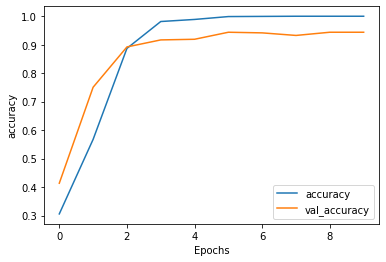

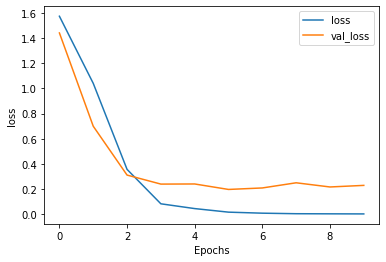

In [29]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [30]:
txt = ["A WeWork shareholder has taken the company to court over the near-$1.7bn (£1.3bn) leaving package approved for ousted co-founder Adam Neumann."]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
labels = ['sport', 'bussiness', 'politics', 'tech', 'entertainment']
print(pred, labels[np.argmax(pred)])

[[3.3766819e-06 9.9933320e-01 6.6093503e-06 1.6560007e-04 3.4931779e-06
  4.8764862e-04]] bussiness
